# PART 1 . Simulation of an epidemic on a given network using an SIR model

## Set up

In [1]:
#!pip install EoN

In [2]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt

## Graph creation

In [3]:
g = nx.read_edgelist("edges-13.csv",delimiter=',',create_using=nx.Graph(),nodetype=int)

In [4]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 5345
Number of edges: 25639
Average degree:   9.5936


In [5]:
spring_pos = nx.spring_layout(g)

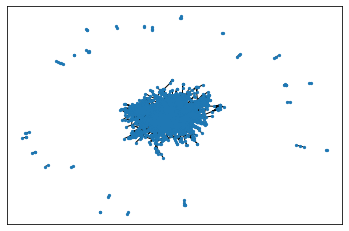

In [6]:
# graph plot
nx.draw_networkx(g,pos=spring_pos,with_labels=False,node_size=5)

## SIR simulation

In [7]:
# Parameters

#transmission rate
beta = 0.005 
#recovery rate
gamma = 0.025 
# population size
N = g.number_of_nodes()
# r_0
r_0 = beta/gamma
print("Value of r_0:", r_0)
# population size
N = g.number_of_nodes()

Value of r_0: 0.19999999999999998


In [8]:
sim = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,return_full_data=True)

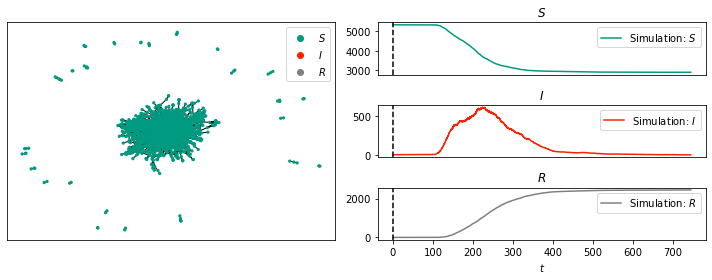

In [9]:
sim.display(time = 1,pos=spring_pos,node_size=5)
plt.show()

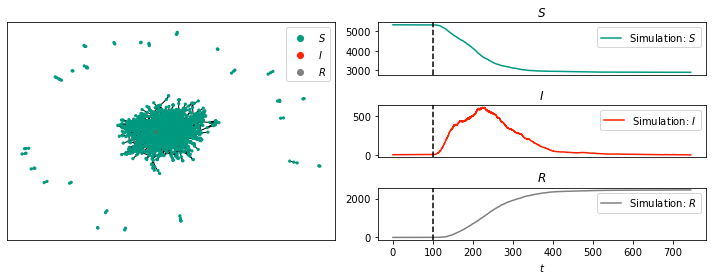

In [10]:
sim.display(time = 100,pos=spring_pos,node_size=5)
plt.show()

## SIR dynamics

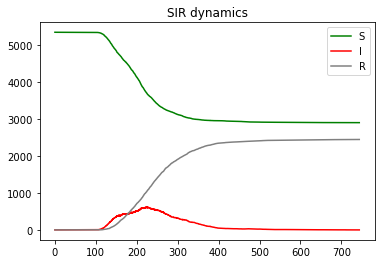

In [11]:
fig, ax = plt.subplots()
ax.plot(sim.t(), sim.S(), label = "S",color="green")
ax.plot(sim.t(), sim.I(), label = "I",color="red")
ax.plot(sim.t(), sim.R(), label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [12]:
# Epidemic size

sim.I().argmax()/N

0.49859681945743684

## Analysis of the final epidemic size as beta changes when gamma is fixed 


In [13]:
# Parameters

gamma = 0.025
betas = [0.005,0.0005]

In [14]:
t1, S1, I1, R1 = EoN.Gillespie_SIR(g,tau = betas[0], gamma = gamma,rho = 0.1)

In [15]:
t2, S2, I2, R2 = EoN.Gillespie_SIR(g,tau = betas[1], gamma = gamma,rho = 0.1)

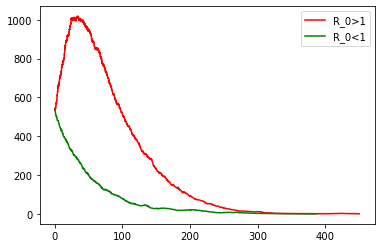

In [16]:
plt.plot(t1, I1, color='r', label='R_0>1')
plt.plot(t2, I2, color='g', label='R_0<1')
plt.legend()
plt.show()

## Study of the epidemic threshold

In [17]:
# Parameters

gamma = 0.025
beta = gamma

In [18]:
sim = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,return_full_data=True)

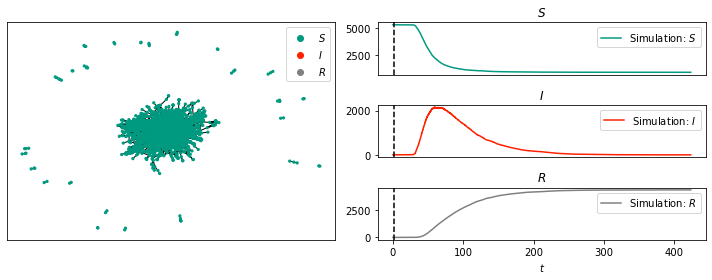

In [19]:
sim.display(time = 1,pos=spring_pos,node_size=5)
plt.show()

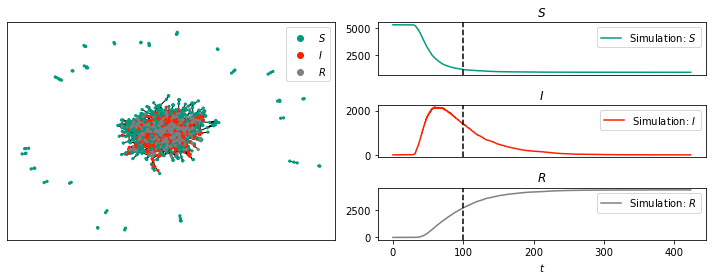

In [20]:
sim.display(time = 100,pos=spring_pos,node_size=5)
plt.show()

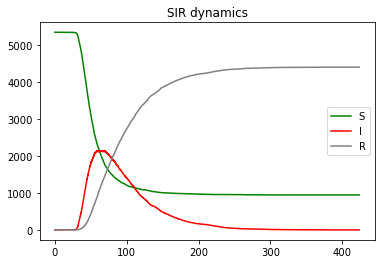

In [21]:
# Dynamics

fig, ax = plt.subplots()
ax.plot(sim.t(), sim.S(), label = "S",color="green")
ax.plot(sim.t(), sim.I(), label = "I",color="red")
ax.plot(sim.t(), sim.R(), label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()